In [14]:
#Problem statement- DATA VISUALIZATION 1
#1) Use theinbuitlt dataset 'titanic'.The dataset contains 891 rows and contains information about the passengers who boarded the unfortunate Titanic ship.
#use the seaborn library to see if we can find any pattern in the data.
#2) Write a code to check how the price of the ticket (column name 'fare')for each passenger is distributed by plotting histrogram


!pip install seaborn matplotlib pandas


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# Load the Titanic dataset
titanic = sns.load_dataset('titanic')


In [4]:
# Display the first few rows
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# Dataset information
titanic.info()
# here :-
#survived:-Indicates whether the passenger survived (1) or not (0).
#pclass:- Passenger class . It represents socio-economic status: 
#sex:– Gender of the passenger 
#age:– Age of the passenger. Some values are missing (NaN).
#sibsp: – Number of siblings or spouses aboard the Titanic.
#parch:– Number of parents or children aboard the Titanic.
#fare:– Fare paid for the ticket.
#embarked: – Port of embarkation:
 # C = Cherbourg 
 # Q = Queenstown 
# S = Southampton 
#class: – Passenger class
#who:– Category of the person 
#adult_male:– Whether the passenger is an adult male 
#deck:– Deck the passenger was on. Many missing values.
#embark_town :– Full name of the port where the passenger embarked.
#alive: – Whether the passenger survived 
#alone :– Whether the passenger was traveling alone

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
# Check for missing values
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
import pandas as pd
# Load Titanic dataset (assuming you have it in a DataFrame named titanic)
# Replace 'your_dataset.csv' with the actual dataset file if loading from a CSV file.
# titanic = pd.read_csv("your_dataset.csv")

In [10]:
# Step 1: Fill missing 'deck' values with mode (most common deck)
titanic['deck'] = titanic['deck'].fillna(titanic['deck'].mode()[0])
# Step 2: Drop rows where 'embarked' or 'embark_town' is missing
titanic_cleaned = titanic.dropna(subset=['embarked', 'embark_town'])
# Step 3: Impute missing 'age' values with the median age
median_age = titanic_cleaned['age'].median()
titanic_cleaned.loc[:, 'age'] = titanic_cleaned['age'].fillna(median_age)
# Step 4: Verify that there are no more missing values missing_values = titanic_cleaned.isnull().sum()
print("Missing Values After Cleaning:\n", missing_values)

Missing Values After Cleaning:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


In [11]:
# Descriptive statistics
titanic_cleaned.describe()

,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


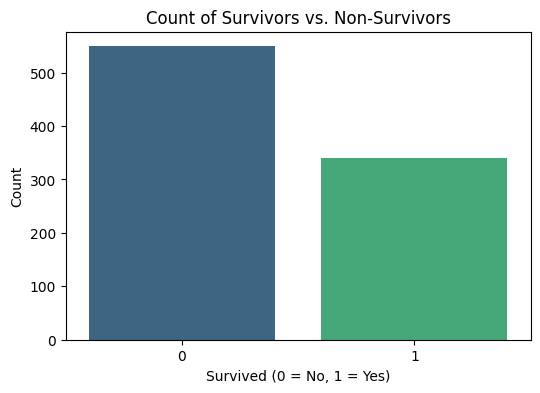

In [13]:
# plot to visualize the number of survivors and non-survivors.
plt.figure(figsize=(6,4))
sns.countplot(x='survived', data=titanic_cleaned, hue='survived', palette='viridis', legend=False)
# viridis Lower values = dark colors,Higher values = bright colors
plt.title('Count of Survivors vs. Non-Survivors')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()
